In [9]:
from flask import * # flask is a web framework
import numpy as np #Numerical Python for processing the arrays 
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt # to plot the data (Bar Graph, Histogram...)

np.random.seed(0)
data = pd.read_csv('C:/Users/Vara/Downloads/data.csv') 

#It prints number of rows and columns in the dataset
print (data.shape)

# Print the 5 first rows of dataset
print(data.head()) 
#print(data.tail()) here the last 5 dataset will be printed
print(data.isnull().sum())

(569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  

In [10]:
# Copy the list of coulmn names
col = data.columns      

# Diagnosis includes our labels and x includes our features
y = data.diagnosis    # M or B 

# Drop the last column, ID and diagnosis
df=data.drop(['Unnamed: 32','id'],axis=1)
x = df.drop('diagnosis',axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


C:\Users\Vara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


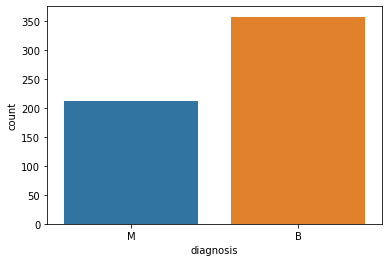

In [4]:
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [11]:
y_df= pd.get_dummies(y,drop_first=True) # dropping the column called diagnosis and having a columns of 0 and 1
y_df.head()
y_df=y_df['M']
prueba=pd.get_dummies(df,'diagnosis')
print(prueba.drop('diagnosis_B',axis=1))

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [12]:
print(x.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
df_train, df_test = train_test_split(df, test_size = 0.2)
x_train=df_train.drop('diagnosis',axis=1)
x_test=df_test.drop('diagnosis',axis=1)
y_train=df_train['diagnosis']
y_test=df_test['diagnosis']
train_l=[]
for item in y_train:
    train_l.append(item)
y_train_Mcount=train_l.count('M')
print("count of Malignant in train data of 80% is ",y_train_Mcount)
y_train_Bcount=train_l.count('B')
print("count of Benign in train data of 80% is ",y_train_Bcount)
train_ourn=y_train_Mcount+y_train_Bcount
test_l=[]
for item in y_test:
    test_l.append(item)
y_test_Mcount=test_l.count('M')
print("count of Malignant in test data of 20% is ",y_test_Mcount)
y_test_Bcount=test_l.count('B')
print("count of Benign in test data of 20% is ",y_test_Bcount)
test_ourn=y_test_Mcount+y_test_Bcount
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#Create the model
modelo_rl= LogisticRegression(solver='lbfgs', max_iter=1000)
#Fit the model
print(modelo_rl.fit(X=x_train,y=y_train))

count of Malignant in train data of 80% is  165
count of Benign in train data of 80% is  290
count of Malignant in test data of 20% is  47
count of Benign in test data of 20% is  67
LogisticRegression(max_iter=1000)


C:\Users\Vara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TEST DATA
True Positive of Test data :  46
False Positive of Test data :  4
True Negative of Test data :  1
False Negative of Test data :  63 

TRAIN DATA
True Positive of Train data :  154
False Positive of Train data :  8
True Negative of Train data :  11
False Negative of Train data :  282 

Test data accuracy :  0.9561
Test data sensitivity :  0.9787
Test data specificity :  0.9844
Test data f1-score :  0.9787
Train data accuracy :  0.9582
Train data sensitivity :  0.9333
Train data specificity :  0.9625
Train data f1-score :  0.9333
              precision    recall  f1-score   support

           B       0.98      0.94      0.96        67
           M       0.92      0.98      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114
 

              precision    recall  f1-score   support

           B       0.96      0.97      0.97       290
           M      

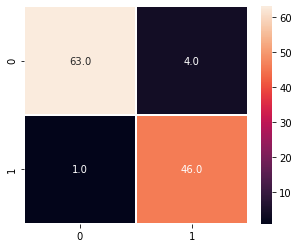

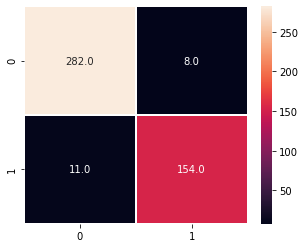

In [14]:
#Prediction
train_prediction_rl = modelo_rl.predict(x_train)
train_countBB00=train_countMB10=train_countBM01=train_countMM11=0
test_prediction_rl = modelo_rl.predict(x_test)
test_countBB00=test_countMB10=test_countBM01=test_countMM11=0
for i in range(train_ourn):
    if(train_l[i]=='B' and train_prediction_rl[i]=='B'):
        train_countBB00+=1
    elif(train_l[i]=='M' and train_prediction_rl[i]=='B'):
        train_countMB10+=1
    elif(train_l[i]=='B' and train_prediction_rl[i]=='M'):
        train_countBM01+=1
    else:
        train_countMM11+=1
for i in range(test_ourn):
    if(test_l[i]=='B' and test_prediction_rl[i]=='B'):
        test_countBB00+=1
    elif(test_l[i]=='M' and test_prediction_rl[i]=='B'):
        test_countMB10+=1
    elif(test_l[i]=='B' and test_prediction_rl[i]=='M'):
        test_countBM01+=1
    else:
        test_countMM11+=1
#Results:
print("TEST DATA")
print("True Positive of Test data : ",test_countMM11)
print("False Positive of Test data : ",test_countBM01)
print("True Negative of Test data : ",test_countMB10)
print("False Negative of Test data : ",test_countBB00,"\n")

print("TRAIN DATA")
print("True Positive of Train data : ",train_countMM11)
print("False Positive of Train data : ",train_countBM01)
print("True Negative of Train data : ",train_countMB10)
print("False Negative of Train data : ",train_countBB00,"\n")
test_acc=(test_countMM11+test_countBB00)/(test_countMM11+test_countMB10+test_countBB00+test_countBM01)
test_sens=test_recall=test_countMM11/(test_countMM11+test_countMB10)
test_spec=test_countBB00/(test_countMB10+test_countBB00)
test_prec=test_countMM11/(test_countMM11+test_countMB10)
test_f1=(2*test_prec*test_recall)/(test_prec+test_recall)
print("Test data accuracy : ",round(test_acc,4))
print("Test data sensitivity : ",round(test_sens,4))
print("Test data specificity : ",round(test_spec,4))
print("Test data f1-score : ",round(test_f1,4))

train_acc=(train_countMM11+train_countBB00)/(train_countMM11+train_countMB10+train_countBB00+train_countBM01)
train_sens=train_recall=train_countMM11/(train_countMM11+train_countMB10)
train_spec=train_countBB00/(train_countMB10+train_countBB00)
train_prec=train_countMM11/(train_countMM11+train_countMB10)
train_f1=(2*train_prec*train_recall)/(train_prec+train_recall)
print("Train data accuracy : ",round(train_acc,4))
print("Train data sensitivity : ",round(train_sens,4))
print("Train data specificity : ",round(train_spec,4))
print("Train data f1-score : ",round(train_f1,4))

#Clasification report
test_results_rl=metrics.classification_report(y_true=y_test, y_pred=test_prediction_rl)
print(test_results_rl,"\n")

train_results_rl=metrics.classification_report(y_true=y_train,y_pred=train_prediction_rl)
print(train_results_rl)

#Confusion matrix
test_cm_rl=metrics.confusion_matrix(y_true=y_test, y_pred=test_prediction_rl)
f,ax = plt.subplots(figsize=(5, 4))
print(sns.heatmap(test_cm_rl, annot=True, linewidths=.5, fmt= '.1f',ax=ax),"\n");

train_cm_rl=metrics.confusion_matrix(y_true=y_train, y_pred=train_prediction_rl)
f,ax = plt.subplots(figsize=(5, 4))
print(sns.heatmap(train_cm_rl, annot=True, linewidths=.5, fmt= '.1f',ax=ax),"\n");

In [15]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# Create the model
modelo_gd= GradientBoostingClassifier()
# Fit the model
print(modelo_gd.fit(X=x_train,y=y_train))

GradientBoostingClassifier()


TEST DATA
True Positive of Test data :  45
False Positive of Test data :  3
True Negative of Test data :  2
False Negative of Test data :  64 

TRAIN DATA
True Positive of Train data :  165
False Positive of Train data :  0
True Negative of Train data :  0
False Negative of Train data :  290 

Test data accuracy :  0.9561
Test data sensitivity :  0.9574
Test data specificity :  0.9697
Test data f1-score :  0.9574

Train data accuracy :  1.0
Train data sensitivity :  1.0
Train data specificity :  1.0
Train data f1-score :  1.0
              precision    recall  f1-score   support

           B       0.97      0.96      0.96        67
           M       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114
 

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       290
           M       1.00      1

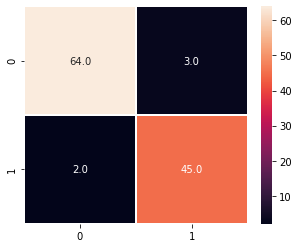

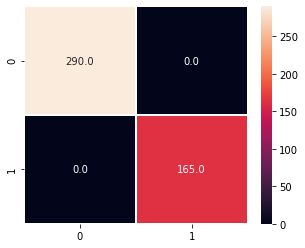

In [16]:
#Prediction
train_prediction_gd = modelo_gd.predict(x_train)
gdtrain_countBB00=gdtrain_countMB10=gdtrain_countBM01=gdtrain_countMM11=0
test_prediction_gd = modelo_gd.predict(x_test)
gdtest_countBB00=gdtest_countMB10=gdtest_countBM01=gdtest_countMM11=0
for i in range(train_ourn):
    if(train_l[i]=='B' and train_prediction_gd[i]=='B'):
        gdtrain_countBB00+=1
    elif(train_l[i]=='M' and train_prediction_gd[i]=='B'):
        gdtrain_countMB10+=1
    elif(train_l[i]=='B' and train_prediction_gd[i]=='M'):
        gdtrain_countBM01+=1
    else:
        gdtrain_countMM11+=1
for i in range(test_ourn):
    if(test_l[i]=='B' and test_prediction_gd[i]=='B'):
        gdtest_countBB00+=1
    elif(test_l[i]=='M' and test_prediction_gd[i]=='B'):
        gdtest_countMB10+=1
    elif(test_l[i]=='B' and test_prediction_gd[i]=='M'):
        gdtest_countBM01+=1
    else:
        gdtest_countMM11+=1
#Results:
print("TEST DATA")
print("True Positive of Test data : ",gdtest_countMM11)
print("False Positive of Test data : ",gdtest_countBM01)
print("True Negative of Test data : ",gdtest_countMB10)
print("False Negative of Test data : ",gdtest_countBB00,"\n")

print("TRAIN DATA")
print("True Positive of Train data : ",gdtrain_countMM11)
print("False Positive of Train data : ",gdtrain_countBM01)
print("True Negative of Train data : ",gdtrain_countMB10)
print("False Negative of Train data : ",gdtrain_countBB00,"\n")

gdtest_acc=(gdtest_countMM11+gdtest_countBB00)/(gdtest_countMM11+gdtest_countMB10+gdtest_countBB00+gdtest_countBM01)
gdtest_sens=gdtest_recall=gdtest_countMM11/(gdtest_countMM11+gdtest_countMB10)
gdtest_spec=gdtest_countBB00/(gdtest_countMB10+gdtest_countBB00)
gdtest_prec=gdtest_countMM11/(gdtest_countMM11+gdtest_countMB10)
gdtest_f1=(2*gdtest_prec*gdtest_recall)/(gdtest_prec+gdtest_recall)
print("Test data accuracy : ",round(gdtest_acc,4))
print("Test data sensitivity : ",round(gdtest_sens,4))
print("Test data specificity : ",round(gdtest_spec,4))
print("Test data f1-score : ",round(gdtest_f1,4))
print("")

gdtrain_acc=(gdtrain_countMM11+gdtrain_countBB00)/(gdtrain_countMM11+gdtrain_countMB10+gdtrain_countBB00+gdtrain_countBM01)
gdtrain_sens=gdtrain_recall=gdtrain_countMM11/(gdtrain_countMM11+gdtrain_countMB10)
gdtrain_spec=gdtrain_countBB00/(gdtrain_countMB10+gdtrain_countBB00)
gdtrain_prec=gdtrain_countMM11/(gdtrain_countMM11+gdtrain_countMB10)
gdtrain_f1=(2*gdtrain_prec*gdtrain_recall)/(gdtrain_prec+gdtrain_recall)
print("Train data accuracy : ",round(gdtrain_acc,4))
print("Train data sensitivity : ",round(gdtrain_sens,4))
print("Train data specificity : ",round(gdtrain_spec,4))
print("Train data f1-score : ",round(gdtrain_f1,4))

#Clasification report
test_results_gd=metrics.classification_report(y_true=y_test, y_pred=test_prediction_gd)
print(test_results_gd,"\n")

train_results_gd=metrics.classification_report(y_true=y_train, y_pred=train_prediction_gd)
print(train_results_gd,"\n")

#Confusion matrix
test_cm_gd=metrics.confusion_matrix(y_true=y_test, y_pred=test_prediction_gd)
f,ax = plt.subplots(figsize=(5, 4))
print(sns.heatmap(test_cm_gd, annot=True, linewidths=.5, fmt= '.1f',ax=ax),"\n");

train_cm_gd=metrics.confusion_matrix(y_true=y_train, y_pred=train_prediction_gd)
f,ax = plt.subplots(figsize=(5, 4))
print(sns.heatmap(train_cm_gd, annot=True, linewidths=.5, fmt= '.1f',ax=ax),"\n");


In [17]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#Create the model
modelo_rf= RandomForestClassifier()
#Fit the model
print(modelo_rf.fit(X=x_train,y=y_train))

RandomForestClassifier()


TEST DATA
True Positive of Test data :  45
False Positive of Test data :  2
True Negative of Test data :  2
False Negative of Test data :  65 

TRAIN DATA
True Positive of Train data :  165
False Positive of Train data :  0
True Negative of Train data :  0
False Negative of Train data :  290 

Test data accuracy :  0.9649
Test data sensitivity :  0.9574
Test data specificity :  0.9701
Test data f1-score :  0.9574
Train data accuracy :  1.0
Train data sensitivity :  1.0
Train data specificity :  1.0
Train data f1-score :  1.0
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        67
           M       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114
 

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       290
           M       1.00      1.

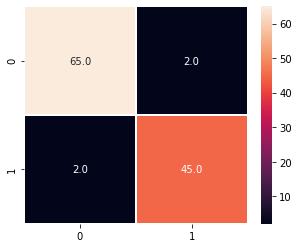

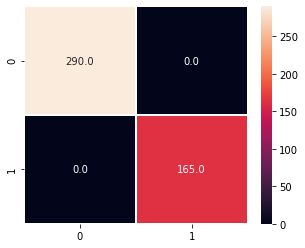

In [18]:
train_prediction_rf = modelo_rf.predict(x_train)
rftrain_countBB00=rftrain_countMB10=rftrain_countBM01=rftrain_countMM11=0
test_prediction_rf = modelo_rf.predict(x_test)
rftest_countBB00=rftest_countMB10=rftest_countBM01=rftest_countMM11=0
for i in range(train_ourn):
    if(train_l[i]=='B' and train_prediction_rf[i]=='B'):
        rftrain_countBB00+=1
    elif(train_l[i]=='M' and train_prediction_rf[i]=='B'):
        rftrain_countMB10+=1
    elif(train_l[i]=='B' and train_prediction_rf[i]=='M'):
        rftrain_countBM01+=1
    else:
        rftrain_countMM11+=1
for i in range(test_ourn):
    if(test_l[i]=='B' and test_prediction_rf[i]=='B'):
        rftest_countBB00+=1
    elif(test_l[i]=='M' and test_prediction_rf[i]=='B'):
        rftest_countMB10+=1
    elif(test_l[i]=='B' and test_prediction_rf[i]=='M'):
        rftest_countBM01+=1
    else:
        rftest_countMM11+=1
#Results:
print("TEST DATA")
print("True Positive of Test data : ",rftest_countMM11)
print("False Positive of Test data : ",rftest_countBM01)
print("True Negative of Test data : ",rftest_countMB10)
print("False Negative of Test data : ",rftest_countBB00,"\n")

print("TRAIN DATA")
print("True Positive of Train data : ",rftrain_countMM11)
print("False Positive of Train data : ",rftrain_countBM01)
print("True Negative of Train data : ",rftrain_countMB10)
print("False Negative of Train data : ",rftrain_countBB00,"\n")
rftest_acc=(rftest_countMM11+rftest_countBB00)/(rftest_countMM11+rftest_countMB10+rftest_countBB00+rftest_countBM01)
rftest_sens=rftest_recall=rftest_countMM11/(rftest_countMM11+rftest_countMB10)
rftest_spec=rftest_countBB00/(rftest_countMB10+rftest_countBB00)
rftest_prec=rftest_countMM11/(rftest_countMM11+rftest_countMB10)
rftest_f1=(2*rftest_prec*rftest_recall)/(rftest_prec+rftest_recall)

print("Test data accuracy : ",round(rftest_acc,4))
print("Test data sensitivity : ",round(rftest_sens,4))
print("Test data specificity : ",round(rftest_spec,4))
print("Test data f1-score : ",round(rftest_f1,4))

rftrain_acc=(rftrain_countMM11+rftrain_countBB00)/(rftrain_countMM11+rftrain_countMB10+rftrain_countBB00+rftrain_countBM01)
rftrain_sens=rftrain_recall=rftrain_countMM11/(rftrain_countMM11+rftrain_countMB10)
rftrain_spec=rftrain_countBB00/(rftrain_countMB10+rftrain_countBB00)
rftrain_prec=rftrain_countMM11/(rftrain_countMM11+rftrain_countMB10)
rftrain_f1=(2*rftrain_prec*rftrain_recall)/(rftrain_prec+rftrain_recall)
print("Train data accuracy : ",round(rftrain_acc,4))
print("Train data sensitivity : ",round(rftrain_sens,4))
print("Train data specificity : ",round(rftrain_spec,4))
print("Train data f1-score : ",round(rftrain_f1,4))

#Clasification report
test_results_rf=metrics.classification_report(y_true=y_test, y_pred=test_prediction_rf)
print(test_results_rf,"\n")

train_results_rf=metrics.classification_report(y_true=y_train, y_pred=train_prediction_rf)
print(train_results_rf,"\n")

#Confusion matrix
test_cm_rf=metrics.confusion_matrix(y_true=y_test, y_pred=test_prediction_rf)
f,ax = plt.subplots(figsize=(5, 4))
print(sns.heatmap(test_cm_rf, annot=True, linewidths=.5, fmt= '.1f',ax=ax),"\n");

train_cm_rf=metrics.confusion_matrix(y_true=y_train, y_pred=train_prediction_rf)
f,ax = plt.subplots(figsize=(5, 4))
print(sns.heatmap(train_cm_rf, annot=True, linewidths=.5, fmt= '.1f',ax=ax),"\n");



In [19]:
#SVM
from sklearn.svm import SVC
# Create the model
modelo_svm= SVC(kernel='linear', C = 1.0)
# Fit the model
print(modelo_svm.fit(X=x_train,y=y_train))

SVC(kernel='linear')


TEST DATA
True Positive of Test data :  46
False Positive of Test data :  4
True Negative of Test data :  1
False Negative of Test data :  63 

TRAIN DATA
True Positive of Train data :  154
False Positive of Train data :  5
True Negative of Train data :  11
False Negative of Train data :  285 

Test data accuracy :  0.9561
Test data sensitivity :  0.9787
Test data specificity :  0.9844
Test data f1-score :  0.9787
Train data accuracy :  0.9648
Train data sensitivity :  0.9333
Train data specificity :  0.9628
Train data f1-score :  0.9333
              precision    recall  f1-score   support

           B       0.98      0.94      0.96        67
           M       0.92      0.98      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114
 

              precision    recall  f1-score   support

           B       0.96      0.98      0.97       290
           M      

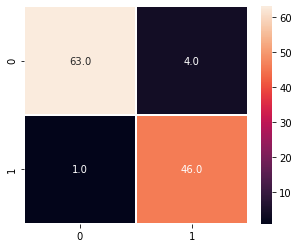

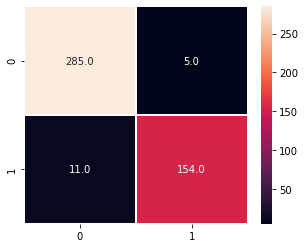

In [20]:
#prediction
train_prediction_svm = modelo_svm.predict(x_train)
strain_countBB00=strain_countMB10=strain_countBM01=strain_countMM11=0
test_prediction_svm = modelo_svm.predict(x_test)
stest_countBB00=stest_countMB10=stest_countBM01=stest_countMM11=0
for i in range(train_ourn):
    if(train_l[i]=='B' and train_prediction_svm[i]=='B'):
        strain_countBB00+=1
    elif(train_l[i]=='M' and train_prediction_svm[i]=='B'):
        strain_countMB10+=1
    elif(train_l[i]=='B' and train_prediction_svm[i]=='M'):
        strain_countBM01+=1
    else:
        strain_countMM11+=1
for i in range(test_ourn):
    if(test_l[i]=='B' and test_prediction_svm[i]=='B'):
        stest_countBB00+=1
    elif(test_l[i]=='M' and test_prediction_svm[i]=='B'):
        stest_countMB10+=1
    elif(test_l[i]=='B' and test_prediction_svm[i]=='M'):
        stest_countBM01+=1
    else:
        stest_countMM11+=1
#Results:
print("TEST DATA")
print("True Positive of Test data : ",stest_countMM11)
print("False Positive of Test data : ",stest_countBM01)
print("True Negative of Test data : ",stest_countMB10)
print("False Negative of Test data : ",test_countBB00,"\n")

print("TRAIN DATA")
print("True Positive of Train data : ",strain_countMM11)
print("False Positive of Train data : ",strain_countBM01)
print("True Negative of Train data : ",strain_countMB10)
print("False Negative of Train data : ",strain_countBB00,"\n")

stest_acc=(stest_countMM11+stest_countBB00)/(stest_countMM11+stest_countMB10+stest_countBB00+stest_countBM01)
stest_sens=stest_recall=stest_countMM11/(stest_countMM11+stest_countMB10)
stest_spec=stest_countBB00/(stest_countMB10+stest_countBB00)
stest_prec=stest_countMM11/(stest_countMM11+stest_countMB10)
stest_f1=(2*stest_prec*stest_recall)/(stest_prec+stest_recall)
print("Test data accuracy : ",round(stest_acc,4))
print("Test data sensitivity : ",round(stest_sens,4))
print("Test data specificity : ",round(stest_spec,4))
print("Test data f1-score : ",round(stest_f1,4))

strain_acc=(strain_countMM11+strain_countBB00)/(strain_countMM11+strain_countMB10+strain_countBB00+strain_countBM01)
strain_sens=strain_recall=strain_countMM11/(strain_countMM11+strain_countMB10)
strain_spec=strain_countBB00/(strain_countMB10+strain_countBB00)
strain_prec=strain_countMM11/(strain_countMM11+strain_countMB10)
strain_f1=(2*strain_prec*strain_recall)/(strain_prec+strain_recall)
print("Train data accuracy : ",round(strain_acc,4))
print("Train data sensitivity : ",round(strain_sens,4))
print("Train data specificity : ",round(strain_spec,4))
print("Train data f1-score : ",round(strain_f1,4))

#Clasification report
test_results_svm=metrics.classification_report(y_true=y_test, y_pred=test_prediction_svm)
print(test_results_svm,"\n")

train_results_svm=metrics.classification_report(y_true=y_train,y_pred=train_prediction_svm)
print(train_results_svm)

#Confusion matrix
test_cm_svm=metrics.confusion_matrix(y_true=y_test, y_pred=test_prediction_svm)
f,ax = plt.subplots(figsize=(5, 4))
print(sns.heatmap(test_cm_svm, annot=True, linewidths=.5, fmt= '.1f',ax=ax),"\n");

train_cm_svm=metrics.confusion_matrix(y_true=y_train, y_pred=train_prediction_svm)
f,ax = plt.subplots(figsize=(5, 4))
print(sns.heatmap(train_cm_svm, annot=True, linewidths=.5, fmt= '.1f',ax=ax),"\n");


In [21]:
#Deep Neural Network with Keras
np.random.seed(0)

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras import callbacks
# Create the model: many layers
model = Sequential()
model.add(Dense(units=160, kernel_initializer='uniform', activation='relu', input_dim=30))

# Adding the second hidden layer
model.add(Dense(units=160, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=160, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=160, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=160, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=160, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=160, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=160, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=160, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=160, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=160, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# Using "Binary_crossentropy"
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

earlystop=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto',verbose=1)
history=model.fit(x_train, pd.get_dummies(y_train,drop_first=True)['M'].values, validation_split=0.2, epochs=500, batch_size=5000, verbose=0, callbacks=[earlystop])

Epoch 00078: early stopping


In [22]:
# Class prediction
#prediction_DNN = model.predict_classess(x_test, batch_size=32)
#prediction_DNN = np.argmax(model.predict(x_test), axis=-1)
prediction_DNN = (model.predict(x_test) > 0.5).astype("int32")
# Clasification report
results_DNN =metrics.classification_report(y_true=pd.get_dummies(y_test,drop_first=True), y_pred=prediction_DNN)
print (results_DNN)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.98      0.89      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



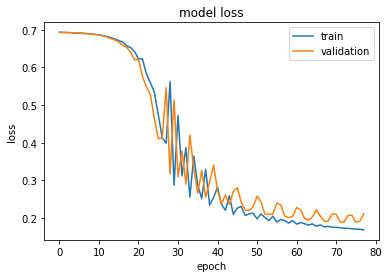

In [23]:
# Summarize history for loss
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right');
plt.show()

AxesSubplot(0.125,0.125;0.62x0.755)


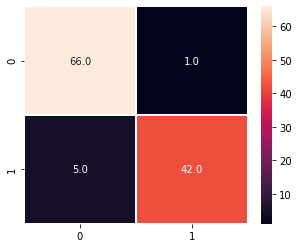

In [24]:
# Confusion Matrix
cm_DNN=metrics.confusion_matrix(y_true=pd.get_dummies(y_test,drop_first=True), y_pred=prediction_DNN)
f,ax = plt.subplots(figsize=(5, 4))
print(sns.heatmap(cm_DNN, annot=True, linewidths=.5, fmt= '.1f',ax=ax))

In [25]:
#Artificial Neural Network with Keras
np.random.seed(0)

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras import callbacks
# Create the model: many layers
model = Sequential()
model.add(Dense(units=160, kernel_initializer='uniform', activation='relu', input_dim=30))

# Adding the second hidden layer
model.add(Dense(units=160, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# Using "Binary_crossentropy"
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Adjusted the model using the previous cost optimizer and function
earlystop=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto',verbose=1)
history=model.fit(x_train, pd.get_dummies(y_train,drop_first=True)['M'].values, validation_split=0.2, epochs=500, batch_size=5000, verbose=0, callbacks=[earlystop])

Epoch 00086: early stopping


In [26]:
# Class prediction
#prediction_ANN = model.predict_classess(x_test, batch_size=32)
#prediction_ANN = np.argmax(model.predict(x_test), axis=-1)
prediction_ANN = (model.predict(x_test) > 0.5).astype("int32")
# Clasification report
results_ANN =metrics.classification_report(y_true=pd.get_dummies(y_test,drop_first=True), y_pred=prediction_ANN)
print (results_ANN)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.98      0.89      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



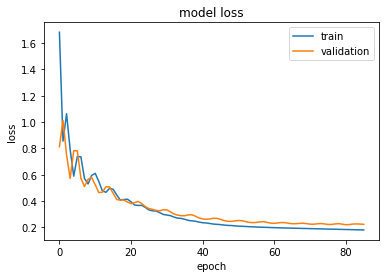

In [27]:
# Summarize history for loss
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right');
plt.show()

AxesSubplot(0.125,0.125;0.62x0.755)


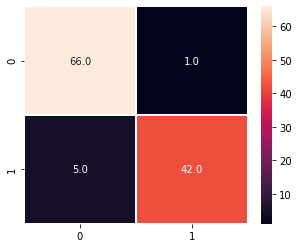

In [28]:
# Confusion Matrix
cm_ANN=metrics.confusion_matrix(y_true=pd.get_dummies(y_test,drop_first=True), y_pred=prediction_ANN)
f,ax = plt.subplots(figsize=(5, 4))
print(sns.heatmap(cm_ANN, annot=True, linewidths=.5, fmt= '.1f',ax=ax))

In [29]:
np.random.seed(0)

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras import callbacks
# Create the model: many layers
l=[]
for i in range(10,110,10):
    model = Sequential()
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu', input_dim=30))

    # Adding the second hidden layer
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+40, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+50, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+60, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+70, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+80, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+90, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+100, kernel_initializer='uniform', activation='relu'))


    # Adding the output layer
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    # Using "Binary_crossentropy"
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Adjusted the model using the previous cost optimizer and function
    earlystop=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto',verbose=1)
    history=model.fit(x_train, pd.get_dummies(y_train,drop_first=True)['M'].values, validation_split=0.2, epochs=500, batch_size=5000, verbose=0, callbacks=[earlystop])
    # Class prediction
    #predicion_DNN = model.predict_classess(x_test, batch_size=32)
    #predicion_DNN = np.argmax(model.predict(x_test), axis=-1)
    predicion_DNN = (model.predict(x_test) > 0.5).astype("int32")
    # Clasification report
    results_DNN =metrics.classification_report(y_true=pd.get_dummies(y_test,drop_first=True), y_pred=predicion_DNN)
    print (results_DNN)
    l.append(results_DNN)

Epoch 00040: early stopping
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        67
           1       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114



C:\Users\Vara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 00099: early stopping
              precision    recall  f1-score   support

           0       0.94      0.87      0.90        67
           1       0.83      0.91      0.87        47

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

Epoch 00085: early stopping
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

Epoch 00082: early stopping
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.98      0.89      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94 

In [30]:
for item in l:
    print(item)

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        67
           1       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        67
           1       0.83      0.91      0.87        47

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

              preci

In [31]:
np.random.seed(0)

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras import callbacks
# Create the model: many layers
for i in range(10,110,10):
    model = Sequential()
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu', input_dim=30))

    # Adding the second hidden layer
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu'))



    # Adding the output layer
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    # Using "Binary_crossentropy"
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Adjusted the model using the previous cost optimizer and function
    earlystop=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto',verbose=1)
    history=model.fit(x_train, pd.get_dummies(y_train,drop_first=True)['M'].values, validation_split=0.2, epochs=500, batch_size=5000, verbose=0, callbacks=[earlystop])
    # Class prediction
    #predicion_DNN = model.predict_classess(x_test, batch_size=32)
    #predicion_DNN = np.argmax(model.predict(x_test), axis=-1)
    predicion_DNN = (model.predict(x_test) > 0.5).astype("int32")
    # Clasification report
    results_DNN =metrics.classification_report(y_true=pd.get_dummies(y_test,drop_first=True), y_pred=predicion_DNN)
    print (results_DNN)
    l.append(results_DNN)

Epoch 00206: early stopping
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        67
           1       0.98      0.87      0.92        47

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

Epoch 00072: early stopping
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

Epoch 00074: early stopping
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.98      0.89      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94 

In [32]:
i=1
for item in l:
    print(i, item)
    i=i+1

1               precision    recall  f1-score   support

           0       0.59      1.00      0.74        67
           1       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

2               precision    recall  f1-score   support

           0       0.94      0.87      0.90        67
           1       0.83      0.91      0.87        47

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

3               precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

4            

In [33]:
np.random.seed(0)

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras import callbacks
# Create the model: many layers
for i in range(10,110,10):
    model = Sequential()
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu', input_dim=30))

    # Adding the second hidden layer
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+20, kernel_initializer='uniform', activation='relu'))

    # Adding the output layer
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    # Using "Binary_crossentropy"
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Adjusted the model using the previous cost optimizer and function
    earlystop=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto',verbose=1)
    history=model.fit(x_train, pd.get_dummies(y_train,drop_first=True)['M'].values, validation_split=0.2, epochs=500, batch_size=5000, verbose=0, callbacks=[earlystop])
    # Class prediction
    #predicion_DNN = model.predict_classess(x_test, batch_size=32)
    #predicion_DNN = np.argmax(model.predict(x_test), axis=-1)
    predicion_DNN = (model.predict(x_test) > 0.5).astype("int32")
    # Clasification report
    results_DNN =metrics.classification_report(y_true=pd.get_dummies(y_test,drop_first=True), y_pred=predicion_DNN)
    print (results_DNN)
    l.append(results_DNN)

Epoch 00100: early stopping
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

Epoch 00067: early stopping
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

Epoch 00066: early stopping
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93 

In [34]:
i=1
for item in l:
    print(i, item)
    i=i+1

1               precision    recall  f1-score   support

           0       0.59      1.00      0.74        67
           1       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

2               precision    recall  f1-score   support

           0       0.94      0.87      0.90        67
           1       0.83      0.91      0.87        47

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

3               precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

4            

In [35]:
np.random.seed(0)

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras import callbacks
# Create the model: many layers
for i in range(10,110,10):
    model = Sequential()
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu', input_dim=30))

    # Adding the second hidden layer
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+30, kernel_initializer='uniform', activation='relu'))
    

    # Adding the output layer
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    # Using "Binary_crossentropy"
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Adjusted the model using the previous cost optimizer and function
    earlystop=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto',verbose=1)
    history=model.fit(x_train, pd.get_dummies(y_train,drop_first=True)['M'].values, validation_split=0.2, epochs=500, batch_size=5000, verbose=0, callbacks=[earlystop])
    # Class prediction
    #predicion_DNN = model.predict_classess(x_test, batch_size=32)
    #predicion_DNN = np.argmax(model.predict(x_test), axis=-1)
    predicion_DNN = (model.predict(x_test) > 0.5).astype("int32")
    # Clasification report
    results_DNN =metrics.classification_report(y_true=pd.get_dummies(y_test,drop_first=True), y_pred=predicion_DNN)
    print (results_DNN)
    l.append(results_DNN)

Epoch 00152: early stopping
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

Epoch 00059: early stopping
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        67
           1       0.95      0.89      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

Epoch 00046: early stopping
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        67
           1       0.95      0.85      0.90        47

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92 

In [36]:
i=1
for item in l:
    print(i, item)
    i=i+1

1               precision    recall  f1-score   support

           0       0.59      1.00      0.74        67
           1       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

2               precision    recall  f1-score   support

           0       0.94      0.87      0.90        67
           1       0.83      0.91      0.87        47

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

3               precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

4            

In [37]:
np.random.seed(0)

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras import callbacks
# Create the model: many layers
for i in range(10,110,10):
    model = Sequential()
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu', input_dim=30))

    # Adding the second hidden layer
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+40, kernel_initializer='uniform', activation='relu'))

    # Adding the output layer
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    # Using "Binary_crossentropy"
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Adjusted the model using the previous cost optimizer and function
    earlystop=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto',verbose=1)
    history=model.fit(x_train, pd.get_dummies(y_train,drop_first=True)['M'].values, validation_split=0.2, epochs=500, batch_size=5000, verbose=0, callbacks=[earlystop])
    # Class prediction
    #predicion_DNN = model.predict_classess(x_test, batch_size=32)
    #predicion_DNN = np.argmax(model.predict(x_test), axis=-1)
    predicion_DNN = (model.predict(x_test) > 0.5).astype("int32")
    # Clasification report
    results_DNN =metrics.classification_report(y_true=pd.get_dummies(y_test,drop_first=True), y_pred=predicion_DNN)
    print (results_DNN)
    l.append(results_DNN)

Epoch 00070: early stopping
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        67
           1       0.95      0.89      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

Epoch 00075: early stopping
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        67
           1       0.95      0.85      0.90        47

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

Epoch 00044: early stopping
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        67
           1       0.93      0.85      0.89        47

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91 

In [38]:
i=1
for item in l:
    print(i,item)
    i=i+1

1               precision    recall  f1-score   support

           0       0.59      1.00      0.74        67
           1       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

2               precision    recall  f1-score   support

           0       0.94      0.87      0.90        67
           1       0.83      0.91      0.87        47

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

3               precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

4            

In [39]:
np.random.seed(0)

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras import callbacks
# Create the model: many layers
for i in range(10,110,10):
    model = Sequential()
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu', input_dim=30))

    # Adding the second hidden layer
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+40, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+50, kernel_initializer='uniform', activation='relu'))


    # Adding the output layer
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    # Using "Binary_crossentropy"
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Adjusted the model using the previous cost optimizer and function
    earlystop=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto',verbose=1)
    history=model.fit(x_train, pd.get_dummies(y_train,drop_first=True)['M'].values, validation_split=0.2, epochs=500, batch_size=5000, verbose=0, callbacks=[earlystop])
    # Class prediction
    #predicion_DNN = model.predict_classess(x_test, batch_size=32)
    #predicion_DNN = np.argmax(model.predict(x_test), axis=-1)
    predicion_DNN = (model.predict(x_test) > 0.5).astype("int32")
    # Clasification report
    results_DNN =metrics.classification_report(y_true=pd.get_dummies(y_test,drop_first=True), y_pred=predicion_DNN)
    print (results_DNN)
    l.append(results_DNN)

Epoch 00086: early stopping
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

Epoch 00060: early stopping
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.98      0.89      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Epoch 00076: early stopping
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93 

In [40]:
i=1
for item in l:
    print(i, item)
    i=i+1

1               precision    recall  f1-score   support

           0       0.59      1.00      0.74        67
           1       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

2               precision    recall  f1-score   support

           0       0.94      0.87      0.90        67
           1       0.83      0.91      0.87        47

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

3               precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

4            

In [41]:
np.random.seed(0)

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras import callbacks
# Create the model: many layers
for i in range(10,110,10):
    model = Sequential()
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu', input_dim=30))

    # Adding the second hidden layer
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+40, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+50, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+60, kernel_initializer='uniform', activation='relu'))


    # Adding the output layer
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    # Using "Binary_crossentropy"
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Adjusted the model using the previous cost optimizer and function
    earlystop=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto',verbose=1)
    history=model.fit(x_train, pd.get_dummies(y_train,drop_first=True)['M'].values, validation_split=0.2, epochs=500, batch_size=5000, verbose=0, callbacks=[earlystop])
    # Class prediction
    #predicion_DNN = model.predict_classess(x_test, batch_size=32)
    #predicion_DNN = np.argmax(model.predict(x_test), axis=-1)
    predicion_DNN = (model.predict(x_test) > 0.5).astype("int32")
    # Clasification report
    results_DNN =metrics.classification_report(y_true=pd.get_dummies(y_test,drop_first=True), y_pred=predicion_DNN)
    print (results_DNN)
    l.append(results_DNN)

Epoch 00085: early stopping
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        67
           1       0.84      0.89      0.87        47

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

Epoch 00055: early stopping
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        67
           1       0.95      0.85      0.90        47

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

Epoch 00052: early stopping
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        67
           1       0.97      0.81      0.88        47

    accuracy                           0.91       114
   macro avg       0.93      0.90      0.91 

In [42]:
i=1
for item in l:
    print(i, item)
    i=i+1

1               precision    recall  f1-score   support

           0       0.59      1.00      0.74        67
           1       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

2               precision    recall  f1-score   support

           0       0.94      0.87      0.90        67
           1       0.83      0.91      0.87        47

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

3               precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

4            

In [43]:
np.random.seed(0)

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras import callbacks
# Create the model: many layers
for i in range(10,110,10):
    model = Sequential()
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu', input_dim=30))

    # Adding the second hidden layer
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+40, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+50, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+60, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+70, kernel_initializer='uniform', activation='relu'))


    # Adding the output layer
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    # Using "Binary_crossentropy"
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Adjusted the model using the previous cost optimizer and function
    earlystop=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto',verbose=1)
    history=model.fit(x_train, pd.get_dummies(y_train,drop_first=True)['M'].values, validation_split=0.2, epochs=500, batch_size=5000, verbose=0, callbacks=[earlystop])
    # Class prediction
    #predicion_DNN = model.predict_classess(x_test, batch_size=32)
    #predicion_DNN = np.argmax(model.predict(x_test), axis=-1)
    predicion_DNN = (model.predict(x_test) > 0.5).astype("int32")
    # Clasification report
    results_DNN =metrics.classification_report(y_true=pd.get_dummies(y_test,drop_first=True), y_pred=predicion_DNN)
    print (results_DNN)
    l.append(results_DNN)

Epoch 00095: early stopping
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        67
           1       0.82      0.89      0.86        47

    accuracy                           0.88       114
   macro avg       0.87      0.88      0.87       114
weighted avg       0.88      0.88      0.88       114

Epoch 00063: early stopping
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        67
           1       0.88      0.89      0.88        47

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

Epoch 00069: early stopping
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        67
           1       0.91      0.89      0.90        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92 

In [44]:
i=1
for item in l:
    print(i, item)
    i=i+1

1               precision    recall  f1-score   support

           0       0.59      1.00      0.74        67
           1       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

2               precision    recall  f1-score   support

           0       0.94      0.87      0.90        67
           1       0.83      0.91      0.87        47

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

3               precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

4            

In [45]:
np.random.seed(0)

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras import callbacks
# Create the model: many layers
for i in range(10,110,10):
    model = Sequential()
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu', input_dim=30))

    # Adding the second hidden layer
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+40, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+50, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+60, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+70, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+80, kernel_initializer='uniform', activation='relu'))


    # Adding the output layer
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    # Using "Binary_crossentropy"
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Adjusted the model using the previous cost optimizer and function
    earlystop=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto',verbose=1)
    history=model.fit(x_train, pd.get_dummies(y_train,drop_first=True)['M'].values, validation_split=0.2, epochs=500, batch_size=5000, verbose=0, callbacks=[earlystop])
    # Class prediction
    #predicion_DNN = model.predict_classess(x_test, batch_size=32)
    #predicion_DNN = np.argmax(model.predict(x_test), axis=-1)
    predicion_DNN = (model.predict(x_test) > 0.5).astype("int32")
    # Clasification report
    results_DNN =metrics.classification_report(y_true=pd.get_dummies(y_test,drop_first=True), y_pred=predicion_DNN)
    print (results_DNN)
    l.append(results_DNN)

Epoch 00110: early stopping
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.98      0.89      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Epoch 00094: early stopping
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

Epoch 00085: early stopping
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        67
           1       0.83      0.94      0.88        47

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89 

In [46]:
i=1
for item in l:
    print(i, item)
    i=i+1

1               precision    recall  f1-score   support

           0       0.59      1.00      0.74        67
           1       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

2               precision    recall  f1-score   support

           0       0.94      0.87      0.90        67
           1       0.83      0.91      0.87        47

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

3               precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

4            

In [47]:
np.random.seed(0)

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras import callbacks
# Create the model: many layers
for i in range(10,110,10):
    model = Sequential()
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu', input_dim=30))

    # Adding the second hidden layer
    model.add(Dense(units=i, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+40, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+50, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+60, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+70, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=i+80, kernel_initializer='uniform', activation='relu'))


    # Adding the output layer
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    # Using "Binary_crossentropy"
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Adjusted the model using the previous cost optimizer and function
    earlystop=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto',verbose=1)
    history=model.fit(x_train, pd.get_dummies(y_train,drop_first=True)['M'].values, validation_split=0.2, epochs=500, batch_size=5000, verbose=0, callbacks=[earlystop])
    # Class prediction
    #predicion_DNN = model.predict_classess(x_test, batch_size=32)
    #predicion_DNN = np.argmax(model.predict(x_test), axis=-1)
    predicion_DNN = (model.predict(x_test) > 0.5).astype("int32")
    # Clasification report
    results_DNN =metrics.classification_report(y_true=pd.get_dummies(y_test,drop_first=True), y_pred=predicion_DNN)
    print (results_DNN)
    l.append(results_DNN)

Epoch 00097: early stopping
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        67
           1       0.84      0.91      0.88        47

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114

Epoch 00086: early stopping
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        67
           1       0.81      0.91      0.86        47

    accuracy                           0.88       114
   macro avg       0.87      0.88      0.88       114
weighted avg       0.88      0.88      0.88       114

Epoch 00080: early stopping
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        67
           1       0.84      0.89      0.87        47

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88 

In [48]:
i=1
for item in l:
    print(i, item)
    i=i+1

1               precision    recall  f1-score   support

           0       0.59      1.00      0.74        67
           1       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

2               precision    recall  f1-score   support

           0       0.94      0.87      0.90        67
           1       0.83      0.91      0.87        47

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114

3               precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

4            

In [60]:
def dnn100(cr):
    eachdnn=[]
    lines = cr.split('\n')
    eachdnn_aux=lines[6].split()
    for i in range(2,5):
        eachdnn.append(float(eachdnn_aux[i]))
    return eachdnn     

In [76]:
total100dnn=[]
avglist=[]
for i in range(len(l)):
    total100dnn.append(dnn100(l[i]))
for i in range(len(total100dnn)):
    print(i+1,total100dnn[i])
for i in range(len(total100dnn)):
    avglist.append(sum(total100dnn[i])/3)
for i in range(len(avglist)):
    print(str(i+1)+":  "+str(avglist[i]))
print("INDEX OF OPTIMIZED DNN:"+str(avglist.index(max(avglist))))

1 [0.29, 0.5, 0.37]
2 [0.88, 0.89, 0.88]
3 [0.95, 0.94, 0.95]
4 [0.95, 0.94, 0.94]
5 [0.92, 0.92, 0.92]
6 [0.87, 0.89, 0.88]
7 [0.88, 0.89, 0.88]
8 [0.93, 0.92, 0.93]
9 [0.94, 0.93, 0.94]
10 [0.95, 0.94, 0.95]
11 [0.95, 0.93, 0.94]
12 [0.94, 0.92, 0.93]
13 [0.95, 0.94, 0.94]
14 [0.95, 0.93, 0.94]
15 [0.95, 0.94, 0.94]
16 [0.95, 0.93, 0.94]
17 [0.95, 0.94, 0.94]
18 [0.95, 0.94, 0.94]
19 [0.95, 0.93, 0.94]
20 [0.95, 0.94, 0.94]
21 [0.94, 0.92, 0.93]
22 [0.94, 0.92, 0.93]
23 [0.94, 0.92, 0.93]
24 [0.94, 0.92, 0.93]
25 [0.94, 0.92, 0.93]
26 [0.94, 0.92, 0.93]
27 [0.94, 0.93, 0.94]
28 [0.94, 0.92, 0.93]
29 [0.94, 0.92, 0.93]
30 [0.93, 0.92, 0.93]
31 [0.94, 0.92, 0.93]
32 [0.94, 0.93, 0.94]
33 [0.93, 0.91, 0.92]
34 [0.94, 0.92, 0.93]
35 [0.93, 0.91, 0.92]
36 [0.93, 0.91, 0.92]
37 [0.9, 0.9, 0.9]
38 [0.93, 0.91, 0.92]
39 [0.92, 0.9, 0.91]
40 [0.93, 0.91, 0.92]
41 [0.94, 0.93, 0.94]
42 [0.93, 0.91, 0.92]
43 [0.92, 0.9, 0.91]
44 [0.93, 0.91, 0.92]
45 [0.93, 0.9, 0.91]
46 [0.93, 0.91, 0.92]
47 [

In [77]:
print(l[avglist.index(max(avglist))])
results_OptimizedDNN=l[avglist.index(max(avglist))]

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



In [78]:
def resultados_classification_report(cr):
    total=[]
    lines = cr.split('\n')
    total_aux=lines[6].split()
    for i in range(2,5):
        total.append(float(total_aux[i]))
    return total        

In [84]:
names=['LogisticRegression','GradientBoost','Random Forest','SVM','Deep Neural Network','ANN','Optimized DNN']
modelResults=[]
modelResults.append(test_results_rl)
modelResults.append(test_results_gd)
modelResults.append(test_results_rf)
modelResults.append(test_results_svm)
modelResults.append(results_DNN)
modelResults.append(results_ANN)
modelResults.append(results_OptimizedDNN)

totalResults=[]
totalPrecision=[]
totalRecall=[]
totalF=[]
for i in range(len(modelResults)):
    totalResults.append(resultados_classification_report(modelResults[i]))
print(totalResults)
   
for i in range(len(totalResults)):
     totalPrecision.append(totalResults[i][0])
     totalRecall.append(totalResults[i][1])
     totalF.append(totalResults[i][2])
print("PRECISION OF ALL MODELS : "+str(totalPrecision))
print("RECALL OF ALL MODELS : "+str(totalRecall))
print("F1-SCORE OF ALL MODELS : "+str(totalF))

[[0.95, 0.96, 0.96], [0.95, 0.96, 0.95], [0.96, 0.96, 0.96], [0.95, 0.96, 0.96], [0.86, 0.73, 0.74], [0.95, 0.94, 0.94], [0.95, 0.94, 0.95]]
PRECISION OF ALL MODELS : [0.95, 0.95, 0.96, 0.95, 0.86, 0.95, 0.95]
RECALL OF ALL MODELS : [0.96, 0.96, 0.96, 0.96, 0.73, 0.94, 0.94]
F1-SCORE OF ALL MODELS : [0.96, 0.95, 0.96, 0.96, 0.74, 0.94, 0.95]


([<matplotlib.axis.XTick at 0x1f4a048ea00>,
 [Text(0.3, 0, 'LogisticRegression'),
  Text(1.3, 0, 'GradientBoost'),
  Text(2.3, 0, 'Random Forest'),
  Text(3.3, 0, 'SVM'),
  Text(4.3, 0, 'Deep Neural Network'),
  Text(5.3, 0, 'ANN'),
  Text(6.3, 0, 'Optimized DNN')])

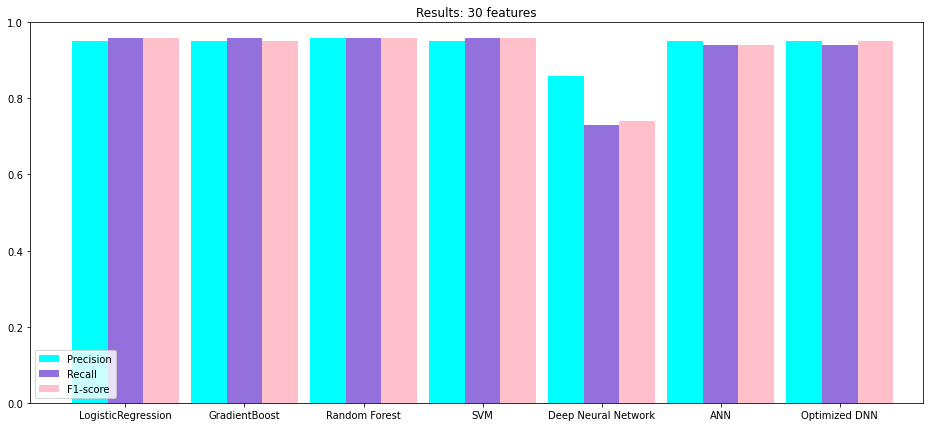

In [80]:
index = np.arange(7)
# Set position of bar on X axis
barWidth=0.3
r1 = np.arange(len(totalPrecision))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.subplots(figsize=(16, 7))
plt.bar(r1,totalPrecision,width=barWidth, label='Precision', color="cyan")
plt.bar(r2,totalRecall,width=barWidth, label='Recall', color="mediumpurple")
plt.bar(r3,totalF,width=barWidth,  label='F1-score', color="pink")
plt.axis([-0.5,7,0, 1])
plt.legend(loc='lower left')
plt.title('Results: 30 features')

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(totalPrecision))], names)

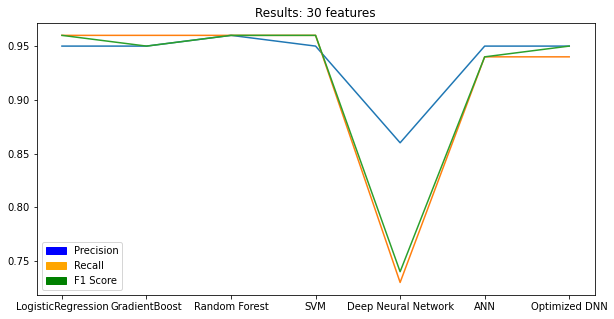

In [81]:
import matplotlib.patches as mpatches
rects=[]
rects.append(mpatches.Patch(color='blue', label='Precision'))
rects.append(mpatches.Patch(color='orange', label='Recall'))
rects.append(mpatches.Patch(color='green', label='F1 Score'))

plt.subplots(figsize=(10, 5))
plt.plot(names,totalResults)
plt.legend(handles=rects);
plt.title('Results: 30 features');